In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('spam.csv', encoding='latin1')
df.sample(5)



,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2523,ham,"Sorry, I'll call later",NaN,NaN,NaN
2167,ham,Yes.he have good crickiting mind,NaN,NaN,NaN
1976,ham,Lol alright i was thinkin that too haha,NaN,NaN,NaN
4327,spam,Congrats! 2 mobile 3G Videophones R yours. cal...,NaN,NaN,NaN
3948,ham,HMM yeah if your not too grooved out! And im l...,NaN,NaN,NaN


In [2]:

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [3]:

df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
1345,ham,Que pases un buen tiempo or something like that
1445,ham,I am in a marriage function
4249,ham,How much for an eighth?
1276,ham,Can do lor...
2172,ham,Yavnt tried yet and never played original either


In [4]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [6]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [7]:
import nltk
!pip install nltk

In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\iC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
df['num_characters'] = df['text'].apply(len)
df.head



<bound method NDFrame.head of       target                                               text  \
0          0  Go until jurong point, crazy.. Available only ...   
1          0                      Ok lar... Joking wif u oni...   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...   
3          0  U dun say so early hor... U c already then say...   
4          0  Nah I don't think he goes to usf, he lives aro...   
...      ...                                                ...   
5567       1  This is the 2nd time we have tried 2 contact u...   
5568       0              Will Ì_ b going to esplanade fr home?   
5569       0  Pity, * was in mood for that. So...any other s...   
5570       0  The guy did some bitching but I acted like i'd...   
5571       0                         Rofl. Its true to its name   

      num_characters  
0                111  
1                 29  
2                155  
3                 49  
4                 61  
...              ...  
5567

In [13]:
df['num_words'] = df['text'].apply(lambda x: len(x.split()))

In [42]:
df.head

<bound method NDFrame.head of       target                                               text  \
0          0  Go until jurong point, crazy.. Available only ...   
1          0                      Ok lar... Joking wif u oni...   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...   
3          0  U dun say so early hor... U c already then say...   
4          0  Nah I don't think he goes to usf, he lives aro...   
...      ...                                                ...   
5567       1  This is the 2nd time we have tried 2 contact u...   
5568       0              Will Ì_ b going to esplanade fr home?   
5569       0  Pity, * was in mood for that. So...any other s...   
5570       0  The guy did some bitching but I acted like i'd...   
5571       0                         Rofl. Its true to its name   

      num_characters  num_words  num_sentences  \
0                111         20              2   
1                 29          6              2   
2              

In [43]:
df.head

<bound method NDFrame.head of       target                                               text  \
0          0  Go until jurong point, crazy.. Available only ...   
1          0                      Ok lar... Joking wif u oni...   
2          1  Free entry in 2 a wkly comp to win FA Cup fina...   
3          0  U dun say so early hor... U c already then say...   
4          0  Nah I don't think he goes to usf, he lives aro...   
...      ...                                                ...   
5567       1  This is the 2nd time we have tried 2 contact u...   
5568       0              Will Ì_ b going to esplanade fr home?   
5569       0  Pity, * was in mood for that. So...any other s...   
5570       0  The guy did some bitching but I acted like i'd...   
5571       0                         Rofl. Its true to its name   

      num_characters  num_words  num_sentences  \
0                111         20              2   
1                 29          6              2   
2              

In [44]:
 import nltk
 nltk.download('punkt_tab')

df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\iC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [45]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,1.965564
std,58.236293,11.068488,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,1.000000
75%,117.000000,22.000000,2.000000
max,910.000000,171.000000,38.000000


In [46]:

# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,1.820195
std,56.358207,11.116240,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,90.000000,18.000000,2.000000
max,910.000000,171.000000,38.000000


In [47]:

#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,2.970904
std,30.137753,5.967672,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

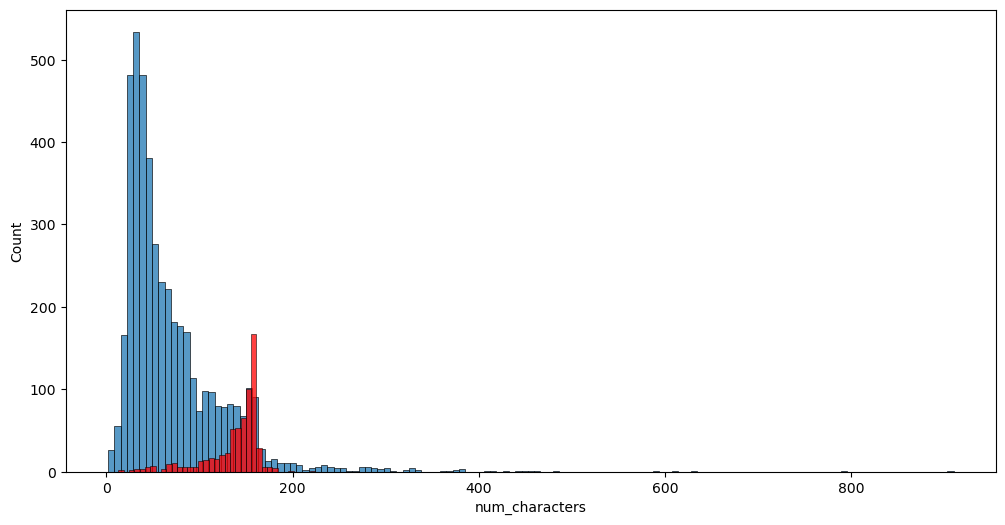

In [48]:
import seaborn as sns

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

In [49]:
from nltk.corpus import stopwords

import string
nltk.download('stopwords')

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]

    
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('fucked')

'fuck'

In [51]:
df['transformed_text'] = df['text'].apply(transform_text)


In [53]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,1,nah think goe usf live around though


In [65]:

pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [67]:
pip install xgboost optuna

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.3/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 672.2 kB/s eta 0:03:43
   ---------------------------------------- 0.5/150.0 MB 672.2 kB/s eta 0:03:43
   ---------------------------------------- 0.5/150.0 MB 672.2 kB/s eta 0:03:43
   ---------------------------------------- 0.8/150.0 MB 486.4 kB/s eta 0:05:07
   ---------------------------------------- 0.8/150.0 MB 486.4 kB/s eta 0:05:07
   ---------------------------------------- 0.8/150.0 MB 486.4 kB/s eta 0:05:07
   ---------------------------------------- 0.8/150.0 MB 486.4 kB/s eta 0:05:07
   ---------------------------------------- 0.8/150.0 MB 486.4 kB/s eta 0:05:07
   ---------------------------------------- 1.0/150.0 MB 364.8 kB/s eta 0:06

In [83]:
import pandas as pd
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

# Replace this line:
# score = accuracy_score(y_val, y_pred)

# With this:

# ------------------- DATA PREP -------------------
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------- OPTUNA OBJECTIVE -------------------
def objective(trial):
    classifier_name = trial.suggest_categorical("classifier", ["LogisticRegression", "RandomForest", "SVC", "MultinomialNB", "XGBoost"])

    if classifier_name == "LogisticRegression":
        c = trial.suggest_loguniform("lr_c", 1e-4, 10.0)
        model = LogisticRegression(C=c, max_iter=1000)

    elif classifier_name == "RandomForest":
        n_estimators = trial.suggest_int("rf_n_estimators", 50, 300)
        max_depth = trial.suggest_int("rf_max_depth", 2, 20)
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)

    elif classifier_name == "SVC":
        c = trial.suggest_loguniform("svc_c", 1e-4, 10.0)
        kernel = trial.suggest_categorical("svc_kernel", ["linear", "rbf"])
        model = SVC(C=c, kernel=kernel)

    elif classifier_name == "MultinomialNB":
        alpha = trial.suggest_loguniform("nb_alpha", 1e-3, 1.0)
        model = MultinomialNB(alpha=alpha)

    elif classifier_name == "XGBoost":
        n_estimators = trial.suggest_int("xgb_n_estimators", 50, 300)
        max_depth = trial.suggest_int("xgb_max_depth", 2, 20)
        learning_rate = trial.suggest_float("xgb_learning_rate", 0.01, 0.3)
        model = XGBClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            learning_rate=learning_rate,
            use_label_encoder=False,
            eval_metric='logloss',
            verbosity=0
        )

    score = cross_val_score(model, X_train, y_train, n_jobs=-1, cv=5, scoring='precision_score')
    return score.mean()

# ------------------- RUN OPTUNA -------------------
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

# ------------------- BEST MODEL TRAIN -------------------
print("Best parameters:", study.best_params)
print("Best accuracy:", study.best_value)

best_params = study.best_params
clf = None

if best_params["classifier"] == "LogisticRegression":
    clf = LogisticRegression(C=best_params["lr_c"], max_iter=1000)

elif best_params["classifier"] == "RandomForest":
    clf = RandomForestClassifier(
        n_estimators=best_params["rf_n_estimators"],
        max_depth=best_params["rf_max_depth"]
    )

elif best_params["classifier"] == "SVC":
    clf = SVC(
        C=best_params["svc_c"],
        kernel=best_params["svc_kernel"]
    )

elif best_params["classifier"] == "MultinomialNB":
    clf = MultinomialNB(alpha=best_params["nb_alpha"])

elif best_params["classifier"] == "XGBoost":
    clf = XGBClassifier(
        n_estimators=best_params["xgb_n_estimators"],
        max_depth=best_params["xgb_max_depth"],
        learning_rate=best_params["xgb_learning_rate"],
        use_label_encoder=False,
        eval_metric='logloss',
        verbosity=0
    )

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = precision(y_test, y_pred)
print(f"Test Accuracy of best model: {acc}")


[I 2025-04-24 18:52:54,763] A new study created in memory with name: no-name-9f17684c-9180-4332-a1b7-b899241265b3
[W 2025-04-24 18:52:54,766] Trial 0 failed with parameters: {'classifier': 'XGBoost', 'xgb_n_estimators': 287, 'xgb_max_depth': 3, 'xgb_learning_rate': 0.1794603983582615} because of the following error: InvalidParameterError("The 'scoring' parameter of cross_val_score must be a str among {'f1_weighted', 'roc_auc_ovr', 'roc_auc_ovo', 'adjusted_rand_score', 'roc_auc_ovo_weighted', 'homogeneity_score', 'r2', 'd2_absolute_error_score', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'f1_samples', 'precision', 'neg_median_absolute_error', 'mutual_info_score', 'precision_micro', 'jaccard', 'neg_mean_squared_error', 'v_measure_score', 'roc_auc', 'neg_log_loss', 'precision_macro', 'jaccard_macro', 'recall_samples', 'recall_micro', 'neg_negative_likelihood_ratio', 'neg_mean_absolute_percentage_error', 'neg_root_mean_squared_log_error', 'adjusted_mutual_info_score', 'co

InvalidParameterError: The 'scoring' parameter of cross_val_score must be a str among {'f1_weighted', 'roc_auc_ovr', 'roc_auc_ovo', 'adjusted_rand_score', 'roc_auc_ovo_weighted', 'homogeneity_score', 'r2', 'd2_absolute_error_score', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'f1_samples', 'precision', 'neg_median_absolute_error', 'mutual_info_score', 'precision_micro', 'jaccard', 'neg_mean_squared_error', 'v_measure_score', 'roc_auc', 'neg_log_loss', 'precision_macro', 'jaccard_macro', 'recall_samples', 'recall_micro', 'neg_negative_likelihood_ratio', 'neg_mean_absolute_percentage_error', 'neg_root_mean_squared_log_error', 'adjusted_mutual_info_score', 'completeness_score', 'neg_mean_absolute_error', 'f1_macro', 'f1', 'neg_brier_score', 'neg_mean_poisson_deviance', 'jaccard_weighted', 'neg_root_mean_squared_error', 'roc_auc_ovr_weighted', 'recall', 'jaccard_samples', 'precision_weighted', 'recall_macro', 'average_precision', 'rand_score', 'explained_variance', 'matthews_corrcoef', 'neg_mean_gamma_deviance', 'neg_mean_squared_log_error', 'recall_weighted', 'jaccard_micro', 'fowlkes_mallows_score', 'accuracy', 'top_k_accuracy', 'f1_micro', 'max_error', 'balanced_accuracy', 'precision_samples'}, a callable or None. Got 'precision_score' instead.